# PCA - Decision Tree Classifier
- This notebook will explore different architectures and hyperparameters of the `DecisionTreeClassifier` looking for an optimal configuration. In this case, the Dataset with a PCA dimensionality reduction will be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Nuñez Sánchez, Fernando
- Romero Romero, Martín


## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed=42
Random.seed!(seed)

TaskLocalRNG()

In [2]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

[ Info: Precompiling Sk_Modeling [top-level]
[ Info: Skipping precompilation since __precompile__(false). Importing Sk_Modeling [top-level].
[ Info: Running `conda install -y -c anaconda conda` in root environment


Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0





## Package Plan ##

  environment location: /home/martin/.julia/conda/3/x86_64

  added / updated specs:
    - conda


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2023.11.~ --> anaconda::ca-certificates-2023.08.22-h06a4308_0 
  certifi            conda-forge/noarch::certifi-2023.11.1~ --> anaconda/linux-64::certifi-2023.11.17-py310h06a4308_0 




Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


[ Info: Running `conda install -y -c conda-forge 'libstdcxx-ng>=3.4,<13.0'` in root environment


Solving environment: ...working... done

## Package Plan ##

  environment location: /home/martin/.julia/conda/3/x86_64

  added / updated specs:
    - libstdcxx-ng[version='>=3.4,<13.0']


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2023.08.22-~ --> conda-forge::ca-certificates-2023.11.17-hbcca054_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            anaconda/linux-64::certifi-2023.11.17~ --> conda-forge/noarch::certifi-2023.11.17-pyhd8ed1ab_0 




Preparing transaction: ...working... 



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




done
Verifying transaction: ...working... done
Executing transaction: ...working... done


## Loading data
- The dataset used in this notebook has been reduced using PCA dimensionality reduction.

In [3]:
file = h5open("pca_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
test_input = read(file, "test_input")
test_tags = read(file, "test_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [4]:
model = :DecisionTree
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = [];

In [5]:
# Define an array of hyperparameter dictionaries for the Decision Tree model
hyperparameters = [
    Dict(:max_depth => 10, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 20, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 50, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 70, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 100, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 120,:criterion => "gini", :random_state => seed) # Deeper trees can capture more detail but risk overfitting
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);


# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 2 -> 0.577 ± 0.035
Hyperparams set 3 -> 0.577 ± 0.035
Hyperparams set 4 -> 0.577 ± 0.035
Hyperparams set 5 -> 0.577 ± 0.035
Hyperparams set 6 -> 0.577 ± 0.035
Hyperparams set 1 -> 0.576 ± 0.046

----- sensitivity means -----
Hyperparams set 2 -> 0.577 ± 0.035
Hyperparams set 3 -> 0.577 ± 0.035
Hyperparams set 4 -> 0.577 ± 0.035
Hyperparams set 5 -> 0.577 ± 0.035
Hyperparams set 6 -> 0.577 ± 0.035
Hyperparams set 1 -> 0.576 ± 0.046

----- specificity means -----
Hyperparams set 2 -> 0.86 ± 0.014
Hyperparams set 3 -> 0.86 ± 0.014
Hyperparams set 4 -> 0.86 ± 0.014
Hyperparams set 5 -> 0.86 ± 0.014
Hyperparams set 6 -> 0.86 ± 0.014
Hyperparams set 1 -> 0.858 ± 0.015

----- ppv means -----
Hyperparams set 2 -> 0.585 ± 0.04

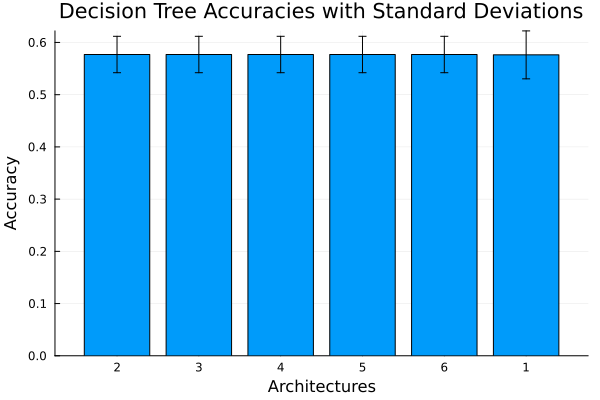

In [6]:
plot_acc_comparison(model, all_metrics)

### Discussion
In this first approach, is noticeable that the 2 and 3 configurations give the best results in terms of accuracy.


### Testing Entropy criterion

In [7]:
hyperparameters = [
    Dict(:max_depth => 10, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 20, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 50, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 10, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 20, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 50, :criterion => "entropy", :random_state => seed) # Deeper trees can capture more detail but usually leads to overfitting
]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 4 -> 0.614 ± 0.035
Hyperparams set 5 -> 0.606 ± 0.038
Hyperparams set 6 -> 0.606 ± 0.038
Hyperparams set 2 -> 0.577 ± 0.035
Hyperparams set 3 -> 0.577 ± 0.035
Hyperparams set 1 -> 0.576 ± 0.046

----- sensitivity means -----
Hyperparams set 4 -> 0.614 ± 0.035
Hyperparams set 5 -> 0.606 ± 0.038
Hyperparams set 6 -> 0.606 ± 0.038
Hyperparams set 2 -> 0.577 ± 0.035
Hyperparams set 3 -> 0.577 ± 0.035
Hyperparams set 1 -> 0.576 ± 0.046

----- specificity means -----
Hyperparams set 4 -> 0.871 ± 0.015
Hyperparams set 5 -> 0.869 ± 0.015
Hyperparams set 6 -> 0.869 ± 0.015
Hyperparams set 2 -> 0.86 ± 0.014
Hyperparams set 3 -> 0.86 ± 0.014
Hyperparams set 1 -> 0.858 ± 0.015

----- ppv means -----
Hyperparams set 4 -> 0.624 ± 0

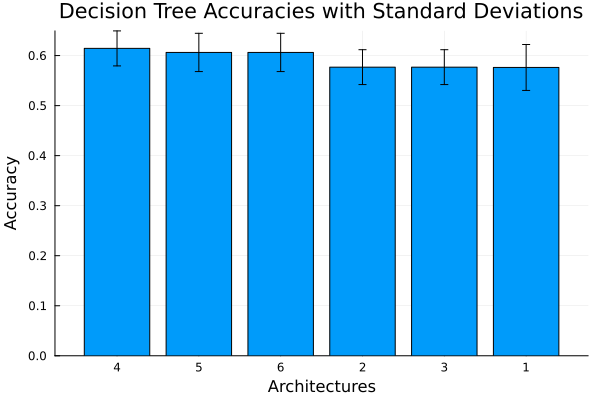

In [8]:
plot_acc_comparison(model, all_metrics)

### Discussion

Model 4 and 5 obtained the best results, so "entropy" criterion seems to perform better than "gini".

### Aproaching max_depth

In [9]:
hyperparameters = [
    Dict(:max_depth => 16, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 18, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 20, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 22, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 24, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 26, :criterion => "entropy", :random_state => seed)
]
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 1 -> 0.606 ± 0.038
Hyperparams set 2 -> 0.606 ± 0.038
Hyperparams set 3 -> 0.606 ± 0.038
Hyperparams set 4 -> 0.606 ± 0.038
Hyperparams set 5 -> 0.606 ± 0.038
Hyperparams set 6 -> 0.606 ± 0.038

----- sensitivity means -----
Hyperparams set 1 -> 0.606 ± 0.038
Hyperparams set 2 -> 0.606 ± 0.038
Hyperparams set 3 -> 0.606 ± 0.038
Hyperparams set 4 -> 0.606 ± 0.038
Hyperparams set 5 -> 0.606 ± 0.038
Hyperparams set 6 -> 0.606 ± 0.038

----- specificity means -----
Hyperparams set 1 -> 0.869 ± 0.015
Hyperparams set 2 -> 0.869 ± 0.015
Hyperparams set 3 -> 0.869 ± 0.015
Hyperparams set 4 -> 0.869 ± 0.015
Hyperparams set 5 -> 0.869 ± 0.015
Hyperparams set 6 -> 0.869 ± 0.015

----- ppv means -----
Hyperparams set 1 -> 0.614 ±

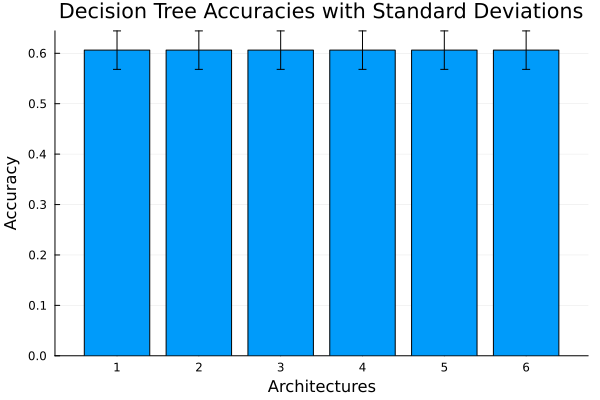

In [10]:
plot_acc_comparison(model, all_metrics)

### Discussion

All models have the same results.

### Testing splitter parameter

In [11]:
hyperparameters = [
    Dict(:max_depth => 23, :criterion => "entropy", :splitter=>"best", :random_state => seed),
    Dict(:max_depth => 24, :criterion => "entropy", :splitter=>"best", :random_state => seed),
    Dict(:max_depth => 25, :criterion => "entropy", :splitter=>"best", :random_state => seed),
    Dict(:max_depth => 23, :criterion => "entropy", :splitter=>"random", :random_state => seed),
    Dict(:max_depth => 24, :criterion => "entropy", :splitter=>"random", :random_state => seed),
    Dict(:max_depth => 25, :criterion => "entropy", :splitter=>"random", :random_state => seed)
]
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 1 -> 0.606 ± 0.038
Hyperparams set 2 -> 0.606 ± 0.038
Hyperparams set 3 -> 0.606 ± 0.038
Hyperparams set 4 -> 0.594 ± 0.043
Hyperparams set 5 -> 0.594 ± 0.043
Hyperparams set 6 -> 0.594 ± 0.043

----- sensitivity means -----
Hyperparams set 1 -> 0.606 ± 0.038
Hyperparams set 2 -> 0.606 ± 0.038
Hyperparams set 3 -> 0.606 ± 0.038
Hyperparams set 4 -> 0.594 ± 0.043
Hyperparams set 5 -> 0.594 ± 0.043
Hyperparams set 6 -> 0.594 ± 0.043

----- specificity means -----
Hyperparams set 1 -> 0.869 ± 0.015
Hyperparams set 2 -> 0.869 ± 0.015
Hyperparams set 3 -> 0.869 ± 0.015
Hyperparams set 4 -> 0.862 ± 0.02
Hyperparams set 5 -> 0.862 ± 0.02
Hyperparams set 6 -> 0.862 ± 0.02

----- ppv means -----
Hyperparams set 1 -> 0.614 ± 0.

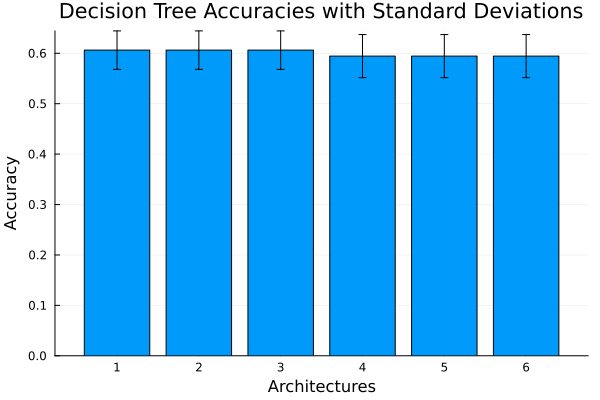

In [12]:
plot_acc_comparison(model, all_metrics)

## Discussion

"Best" splitter obtained the best results.

### Final Model

In [13]:
hyperparameters = [
    
    Dict(:max_depth => 10, :criterion => "entropy", :splitter=> "best",:random_state => seed),

]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

Training with set of hyperparameters 1

----- acc means -----
Hyperparams set 1 -> 0.614 ± 0.035

----- sensitivity means -----
Hyperparams set 1 -> 0.614 ± 0.035

----- specificity means -----
Hyperparams set 1 -> 0.871 ± 0.015

----- ppv means -----
Hyperparams set 1 -> 0.624 ± 0.043

----- npv means -----
Hyperparams set 1 -> 0.867 ± 0.012

----- f_score means -----
Hyperparams set 1 -> 0.615 ± 0.037

----- err_rate -----
Hyperparams set 1 -> 0.386 ± 0.035


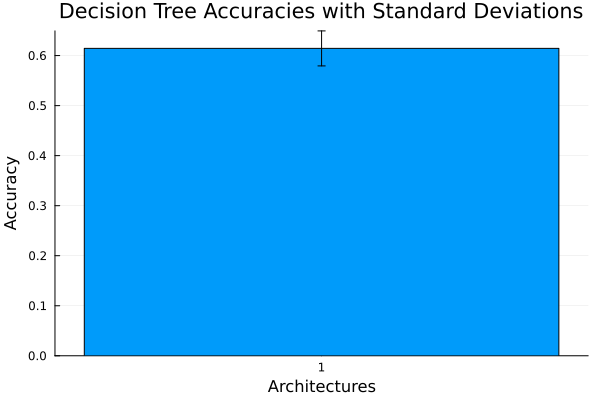

In [14]:
plot_acc_comparison(model, all_metrics)

## Final discussion

Finally, as can be seen in the graph below, the results obtained in the second experiment are quite better than the others, but experiment 3 and 4 are closer to the second. The model with a higher accuracy score has the following hyperparameters:

    1. max_depth: 10
    2. criterion: entropy
    3. splitter: best

All of this results in an accuracy of **0.614 ± 0.035**.

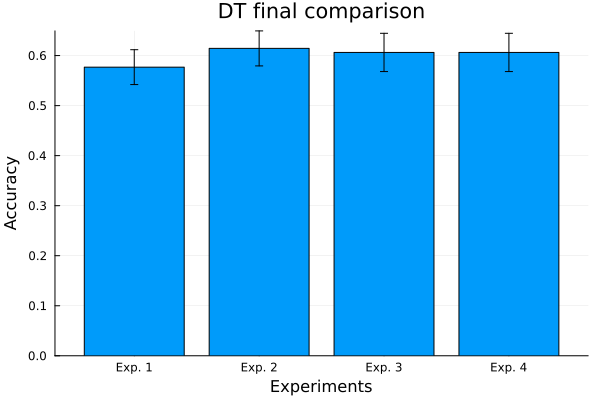

In [16]:
plot_final_comparison("DT final comparison", best_models_acc)